<a href="https://colab.research.google.com/github/lmansf/EDA-with-AirBnb/blob/main/AirBnB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: AirBnB Open Data
## Data Source
https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data
## Goals
- Manipulate and clean up the data to prepare for analysis
- Identify features that correspond to high review rating numbers.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/Airbnb_Open_Data.csv')

/tmp/ipython-input-40501692.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Airbnb_Open_Data.csv')


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head(5)

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   
1  40.75362 -73.98377  United States           US            False   
2  40.80902 -73.94190  United States           US             True   
3  40.68514 -73.95976  United States           US             True   
4  40.79851 -73.94399  United States           US            False   

  cancellation_policy        room type  Construction year  price service fee  \
0              strict     Private room             2020.0  $966        $193    
1            moderate  Entire home/apt             2007.0  $142         $28    
2            flexible     Private room             2005.0  $620        $124    
3            moderate  Entire home/apt             2005.0  $368         $74    
4            moderate  Entire home/apt             2009.0  $204         $41    

   minimum nights  number of reviews last review  reviews per month  \
0            10.0                9.0  10/19/2021               0.21   
1            30.0               45.0   5/21/2022               0.38   
2             3.0                0.0         NaN                NaN   
3            30.0              270.0    7/5/2019               4.64   
4            10.0                9.0  11/19/2018               0.10   

   review rate number  calculated host listings count  availability 365  \
0                 4.0                             6.0             286.0   
1                 4.0                             2.0             228.0   
2                 5.0                             1.0             352.0   
3                 4.0                             1.0             322.0   
4                 3.0                             1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN

## Engineered Features
- host gender
- house rules sentiment
- name includes neighborhood group
- length of the listing name (total words)
- One hot Encode neighborhood group

In [ ]:
!pip install gender-guesser -q
import gender_guesser.detector as gender

# Initialize the gender detector
d = gender.Detector()

def identify_gender(name):
    if pd.isna(name):
        return 'Unknown'

    # Get the first part of the name and ensure it is capitalized correctly
    # This helps with names like "John Doe" -> "John"
    first_name = str(name).split()[0].capitalize()

    gender_pred = d.get_gender(first_name)

    # Map predictions to Male, Female, or Unknown
    if 'female' in gender_pred:
        return '0'
    elif 'male' in gender_pred:
        return '1'
    else:
        return 'Unknown'

# Apply the function to the 'host name' column
df['host_gender'] = df['host name'].apply(identify_gender)

# Display the new column alongside the names to verify
df[['host name', 'host_gender']].head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 7.5 MB/s eta 0:00:00


host name host_gender
0  Madaline           0
1     Jenna           0
2     Elise           0
3     Garry           1
4    Lyndon           1

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

def rate_positivity(text):
    if pd.isna(text):
        return None

    # Get the polarity scores
    scores = sid.polarity_scores(str(text))

    # Compound score ranges from -1 (most negative) to 1 (most positive)
    # We treat anything <= 0 as 0 (neutral/negative), and scale positive values to 0-5
    compound = scores['compound']

    if compound <= 0:
        return 0.0
    else:
        return compound * 5.0

# Apply the function to the 'house_rules' column
df['house_rules_positivity'] = df['house_rules'].apply(rate_positivity)

# Display the results to verify
display(df[['house_rules', 'house_rules_positivity']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


house_rules  house_rules_positivity
0  Clean up and treat the home the way you'd like...                  3.4540
1  Pet friendly but please confirm with me if the...                  4.8305
2  I encourage you to use my kitchen, cooking and...                  0.0000
3                                                NaN                     NaN
4  Please no smoking in the house, porch or on th...                  1.7000

In [ ]:
df.dropna(subset=['NAME','number of reviews','host name'],inplace=True)

In [ ]:
df['has_rules'] = df['house_rules'].notna()

In [ ]:
df.replace({'has_rules': {True: 1, False: 0}}, inplace=True)
df['house_rules_positivity'].fillna(3, inplace=True)

/tmp/ipython-input-1953052938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'has_rules': {True: 1, False: 0}}, inplace=True)
/tmp/ipython-input-1953052938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['house_rules_positivity'].fillna(3, inplace=True)


In [ ]:
def check_location_match(row):
    # Check if neighbourhood group is in NAME (case-insensitive)
    if pd.notna(row['NAME']) and pd.notna(row['neighbourhood group']):
        if str(row['neighbourhood group']).lower() in str(row['NAME']).lower():
            return 1
    return 0

df['local_name'] = df.apply(check_location_match, axis=1)

# Display the result
display(df[['NAME', 'neighbourhood group', 'local_name']].head())

NAME neighbourhood group  \
0                Clean & quiet apt home by the park            Brooklyn   
1                             Skylit Midtown Castle           Manhattan   
2               THE VILLAGE OF HARLEM....NEW YORK !           Manhattan   
4  Entire Apt: Spacious Studio/Loft by central park           Manhattan   
5         Large Cozy 1 BR Apartment In Midtown East           Manhattan   

   local_name  
0           0  
1           0  
2           0  
4           0  
5           0

In [ ]:
# Calculate the number of words in the 'NAME' column
df['listing_length'] = df['NAME'].str.split().str.len()

# Display the results
display(df[['NAME', 'listing_length']].head())

NAME  listing_length
0                Clean & quiet apt home by the park               8
1                             Skylit Midtown Castle               3
2               THE VILLAGE OF HARLEM....NEW YORK !               6
4  Entire Apt: Spacious Studio/Loft by central park               7
5         Large Cozy 1 BR Apartment In Midtown East               8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101767 entries, 0 to 102598
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              101767 non-null  int64  
 1   NAME                            101767 non-null  object 
 2   host id                         101767 non-null  int64  
 3   host_identity_verified          101491 non-null  object 
 4   host name                       101767 non-null  object 
 5   neighbourhood group             101741 non-null  object 
 6   neighbourhood                   101751 non-null  object 
 7   lat                             101759 non-null  float64
 8   long                            101759 non-null  float64
 9   country                         101241 non-null  object 
 10  country code                    101645 non-null  object 
 11  instant_bookable                101671 non-null  object 
 12  cancellation_policy  

In [ ]:
# One-hot encode column 'neighbourhood'
df = pd.get_dummies(df, columns=['cancellation_policy'],dtype=int)

In [ ]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
4               verified    Lyndon           Manhattan   East Harlem   
5               verified  Michelle           Manhattan   Murray Hill   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   
1  40.75362 -73.98377  United States           US            False   
2  40.80902 -73.94190  United States           US             True   
4  40.79851 -73.94399  United States           US            False   
5  40.74767 -73.97500  United States           US             True   

         room type  Construction year  price service fee  minimum nights  \
0     Private room             2020.0  $966        $193             10.0   
1  Entire home/apt             2007.0  $142         $28             30.0   
2     Private room             2005.0  $620        $124              3.0   
4  Entire home/apt             2009.0  $204         $41             10.0   
5  Entire home/apt             2013.0  $577        $115              3.0   

   number of reviews last review  reviews per month  review rate number  \
0                9.0  10/19/2021               0.21                 4.0   
1               45.0   5/21/2022               0.38                 4.0   
2                0.0         NaN                NaN                 5.0   
4                9.0  11/19/2018               0.10                 3.0   
5               74.0   6/22/2019               0.59                 3.0   

   calculated host listings count  availability 365  \
0                             6.0             286.0   
1                             2.0             228.0   
2                             1.0             352.0   
4                             1.0             289.0   
5                             1.0             374.0   

                                         house_rules license host_gender  \
0  Clean up and treat the home the way you'd like...     NaN           0   
1  Pet friendly but please confirm with me if the...     NaN           0   
2  I encourage you to use my kitchen, cooking and...     NaN           0   
4  Please no smoking in the house, porch or on th...     NaN           1   
5                  No smoking, please, and no drugs.     NaN           0   

   house_rules_positivity  has_rules  local_name  listing_length  \
0                  3.4540          1           0               8   
1                  4.8305          1           0               3   
2                  0.0000          1           0               6   
4                  1.7000          1           0               7   
5                  0.0000          1           0               8   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                             0                             0   
1                             0                             1   
2                             1                             0   
4                             0                             1   
5                             1                             0   

   cancellation_policy_strict  
0                           1  
1                           0  
2                           0  
4                           0  
5                           0

## Handling NA Values & Dropping extra columns
- Filtered: where more than 2 reviews were left for the airbnb
- removed "$" and "," from the service fee and price to make numeric
- handle date by converting last review to review recency (days since review as of (today)
- move our target column (review rate number) to the end
- drop unused columns: 'id','NAME','host id','host name','lat','long','country','country code','house_rules','license','last review'

In [ ]:
# Number of reviews will be greater than 2 for looking at review scores
df = df[df['number of reviews'] > 2]

In [ ]:
# remove "$" and "," from price and service fee, then convert to float
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)
df['service fee'] = df['service fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)

In [ ]:
# turn "last review" date into "review recency"
df['last review'] = pd.to_datetime(df['last review'])
df['review recency'] = (pd.to_datetime('today') - df['last review']).dt.days


In [ ]:
# move review rate number to the last column in the dataframe
df['review rate number'] = df.pop('review rate number')

In [ ]:
df = df.drop(columns=['id','neighbourhood group','host_identity_verified','room type','neighbourhood','NAME','host id','host name','lat','long','country','country code','house_rules','license','last review'])

In [ ]:
df.head(10)

instant_bookable  Construction year   price  service fee  minimum nights  \
0             False             2020.0   966.0        193.0            10.0   
1             False             2007.0   142.0         28.0            30.0   
4             False             2009.0   204.0         41.0            10.0   
5              True             2013.0   577.0        115.0             3.0   
6             False             2015.0    71.0         14.0            45.0   
7             False             2009.0  1060.0        212.0            45.0   
8              True             2005.0  1018.0        204.0             2.0   
9             False             2015.0   291.0         58.0             2.0   
10            False             2004.0   319.0         64.0             1.0   
11             True             2008.0   606.0        121.0             5.0   

    number of reviews  reviews per month  calculated host listings count  \
0                 9.0               0.21                             6.0   
1                45.0               0.38                             2.0   
4                 9.0               0.10                             1.0   
5                74.0               0.59                             1.0   
6                49.0               0.40                             1.0   
7                49.0               0.40                             1.0   
8               430.0               3.47                             1.0   
9               118.0               0.99                             1.0   
10              160.0               1.33                             4.0   
11               53.0               0.43                             1.0   

    availability 365 host_gender  house_rules_positivity  has_rules  \
0              286.0           0                  3.4540          1   
1              228.0           0                  4.8305          1   
4              289.0           1                  1.7000          1   
5              374.0           0                  0.0000          1   
6              224.0           0                  3.5605          1   
7              219.0           0                  4.9685          1   
8              180.0           0                  4.7340          1   
9              375.0           1                  4.3070          1   
10               1.0           0                  3.0000          0   
11             163.0           1                  4.6685          1   

    local_name  listing_length  cancellation_policy_flexible  \
0            0               8                             0   
1            0               3                             0   
4            0               7                             0   
5            0               8                             1   
6            0               1                             0   
7            0               1                             0   
8            0               5                             0   
9            0               7                             0   
10           0               8                             1   
11           0               6                             1   

    cancellation_policy_moderate  cancellation_policy_strict  review recency  \
0                              0                           1          1539.0   
1                              1                           0          1325.0   
4                              1                           0          2604.0   
5                              0                           0          2389.0   
6                              1                           0          3014.0   
7                              1                           0          3014.0   
8                              0                           1          2387.0   
9                              0                           1          3090.0   
10                             0                           0          2402.0   
11       

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

# Convert 'host_gender' to numeric: map '0' to 0, '1' to 1, and 'Unknown' to NaN
df['host_gender'] = df['host_gender'].replace({'0': 0, '1': 1, 'Unknown': np.nan})
df['host_gender'] = df['host_gender'].astype(float) # Ensure it's float type

# Impute NaN values in 'host_gender' with the mode
mode_host_gender = df['host_gender'].mode()[0]
df['host_gender'].fillna(mode_host_gender, inplace=True)

scaled_data = scaler.fit_transform(df)

scaled_data

/tmp/ipython-input-410695931.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_gender'].fillna(mode_host_gender, inplace=True)


array([[-0.99585426,  1.30197506,  1.02688385, ...,  1.41789662,
        -1.50334157,  0.56428401],
       [-0.99585426, -0.95134223, -1.46118245, ..., -0.70527004,
        -1.90942885,  0.56428401],
       [-0.99585426, -0.60467803, -1.27397358, ..., -0.70527004,
         0.51760682, -0.21140395],
       ...,
       [-0.99585426, -1.29800643,  1.54925699, ...,  1.41789662,
         0.43031703,  1.33997198],
       [ 1.004163  ,  0.78197876,  1.42847707, ...,  1.41789662,
         2.73780363,  0.56428401],
       [ 1.004163  ,  0.43531456, -0.24130528, ...,  1.41789662,
         2.67138749, -0.21140395]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=df.index)
scaled_data_df.dropna(inplace=True)

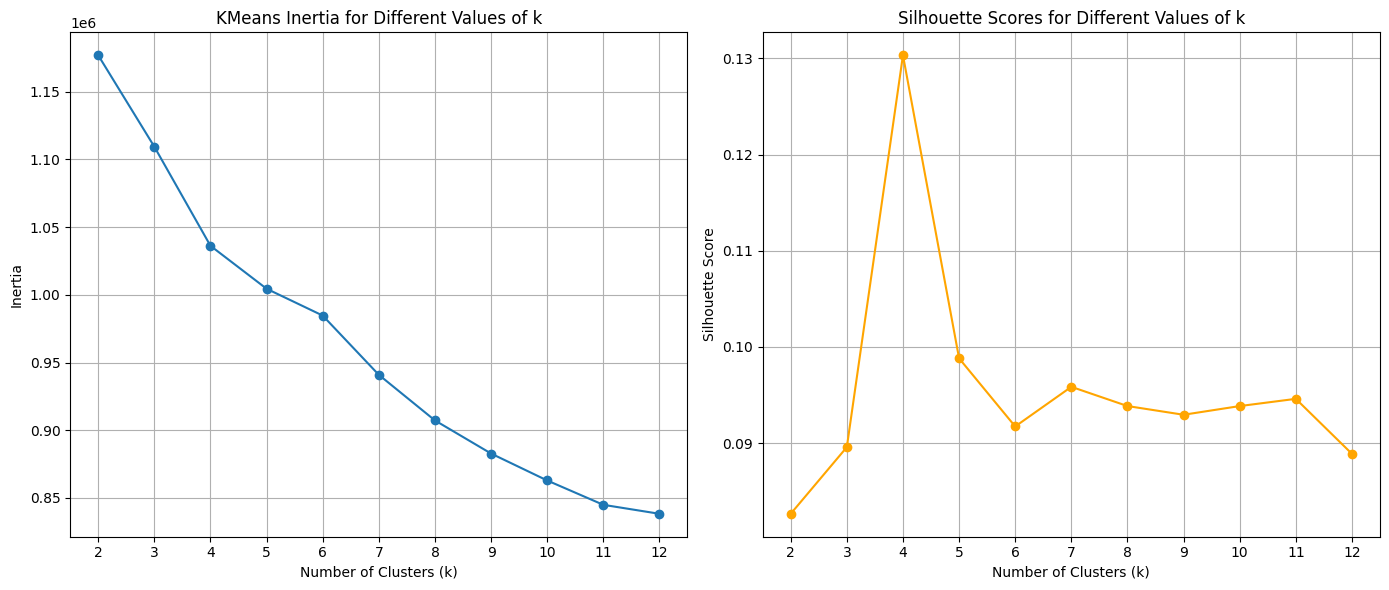

In [ ]:
max_k = 12

inertia = []
silhouette_scores = []

k_values = range(2,max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state = 42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Different Values of k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 3, 3, ..., 1, 1, 1], dtype=int32)

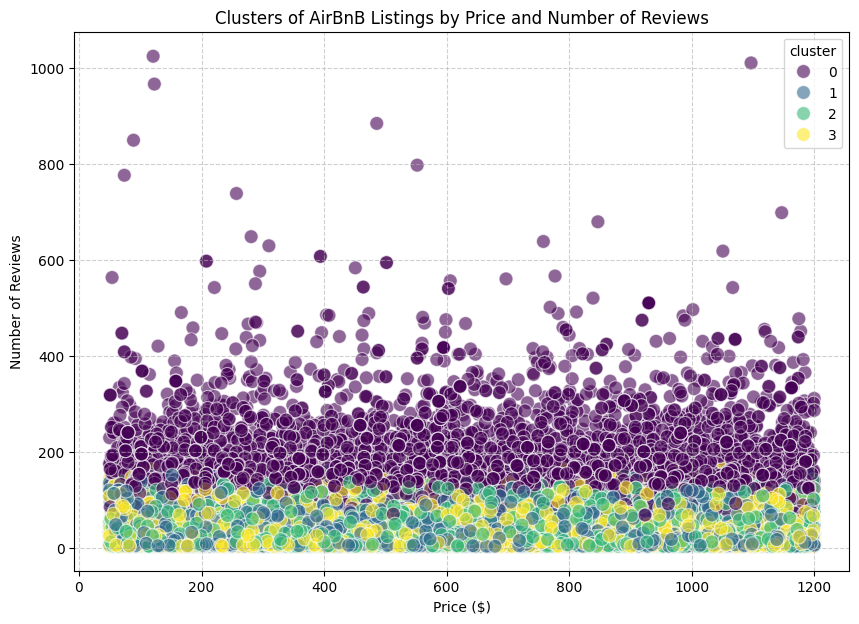

In [ ]:
# Reindex the original DataFrame to match the scaled_data_df index before adding clusters
df_clustered = df.loc[scaled_data_df.index].copy()

# Add the cluster labels to the DataFrame
df_clustered['cluster'] = cluster_labels

# Visualize the clusters on a scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='price', y='number of reviews', hue='cluster', data=df_clustered, palette='viridis', legend='full', s=100, alpha=0.6)
plt.title('Clusters of AirBnB Listings by Price and Number of Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df_clustered.head()

instant_bookable  Construction year  price  service fee  minimum nights  \
0            False             2020.0  966.0        193.0            10.0   
1            False             2007.0  142.0         28.0            30.0   
4            False             2009.0  204.0         41.0            10.0   
5             True             2013.0  577.0        115.0             3.0   
6            False             2015.0   71.0         14.0            45.0   

   number of reviews  reviews per month  calculated host listings count  \
0                9.0               0.21                             6.0   
1               45.0               0.38                             2.0   
4                9.0               0.10                             1.0   
5               74.0               0.59                             1.0   
6               49.0               0.40                             1.0   

   availability 365  host_gender  house_rules_positivity  has_rules  \
0             286.0          0.0                  3.4540          1   
1             228.0          0.0                  4.8305          1   
4             289.0          1.0                  1.7000          1   
5             374.0          0.0                  0.0000          1   
6             224.0          0.0                  3.5605          1   

   local_name  listing_length  cancellation_policy_flexible  \
0           0               8                             0   
1           0               3                             0   
4           0               7                             0   
5           0               8                             1   
6           0               1                             0   

   cancellation_policy_moderate  cancellation_policy_strict  review recency  \
0                             0                           1          1539.0   
1                             1                           0          1325.0   
4                             1                           0          2604.0   
5                             0                           0          2389.0   
6                             1                           0          3014.0   

   review rate number  cluster  
0                 4.0        1  
1                 4.0        3  
4                 3.0        3  
5                 3.0        2  
6                 5.0        3

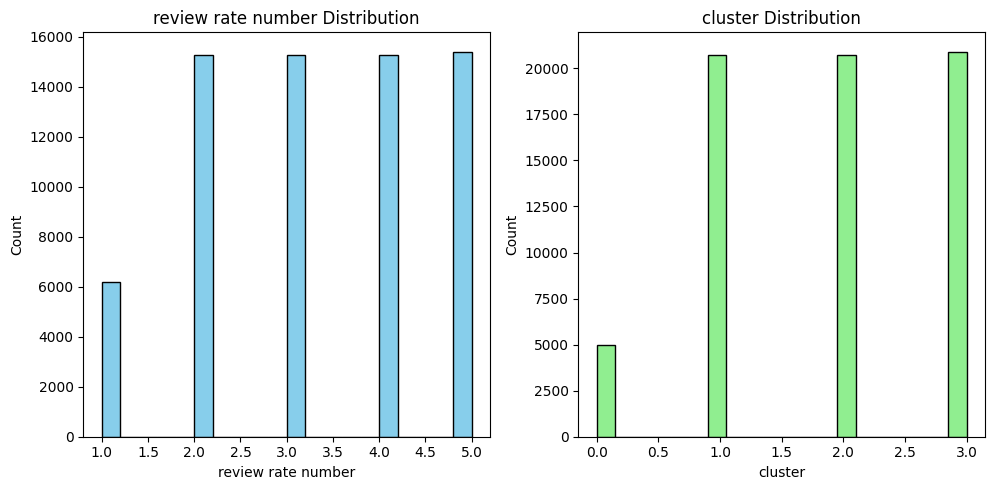

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(df_clustered['review rate number'], bins=20, color='skyblue', edgecolor='black')
plt.title('review rate number Distribution')
plt.xlabel('review rate number')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df_clustered['cluster'], bins=20, color='lightgreen', edgecolor='black')
plt.title('cluster Distribution')
plt.xlabel('cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

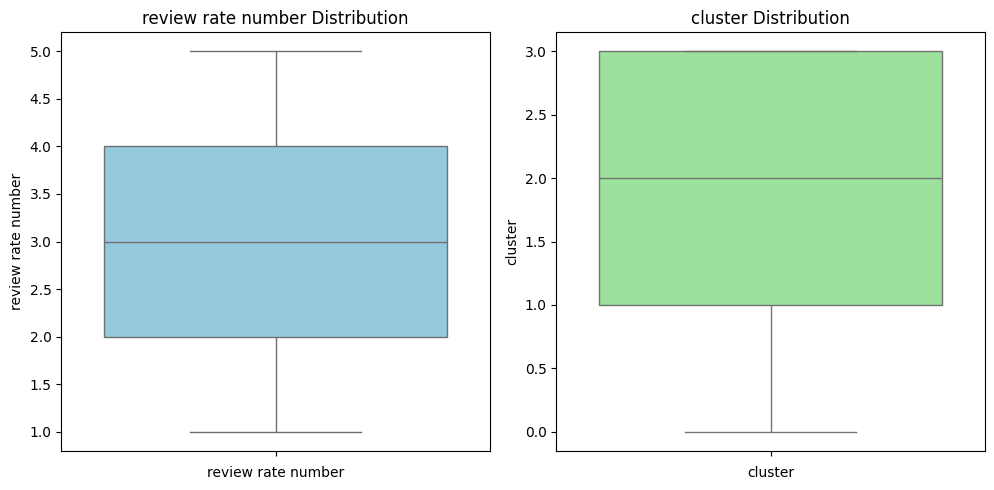

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_clustered['review rate number'], color='skyblue')
plt.title('review rate number Distribution')
plt.xlabel('review rate number')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_clustered['cluster'], color='lightgreen')
plt.title('cluster Distribution')
plt.xlabel('cluster')

plt.tight_layout()
plt.show()

In [ ]:
# Lets look at the clusters in the high rated places only:
minimum_rating = 4
high_rated_listings = df_clustered[df_clustered['review rate number'] >= minimum_rating]

Text(0.5, 0, 'cluster')

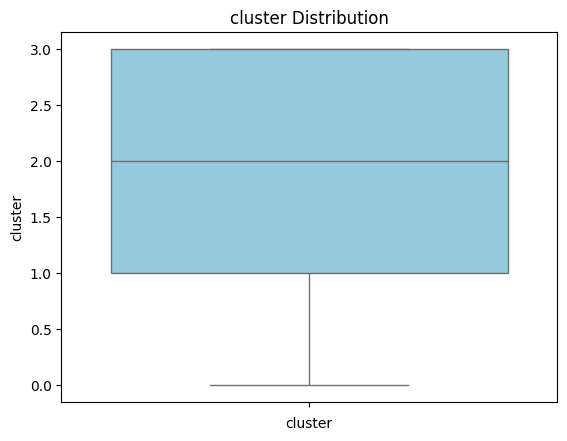

In [ ]:
sns.boxplot(data=high_rated_listings['cluster'], color='skyblue')
plt.title('cluster Distribution')
plt.xlabel('cluster')

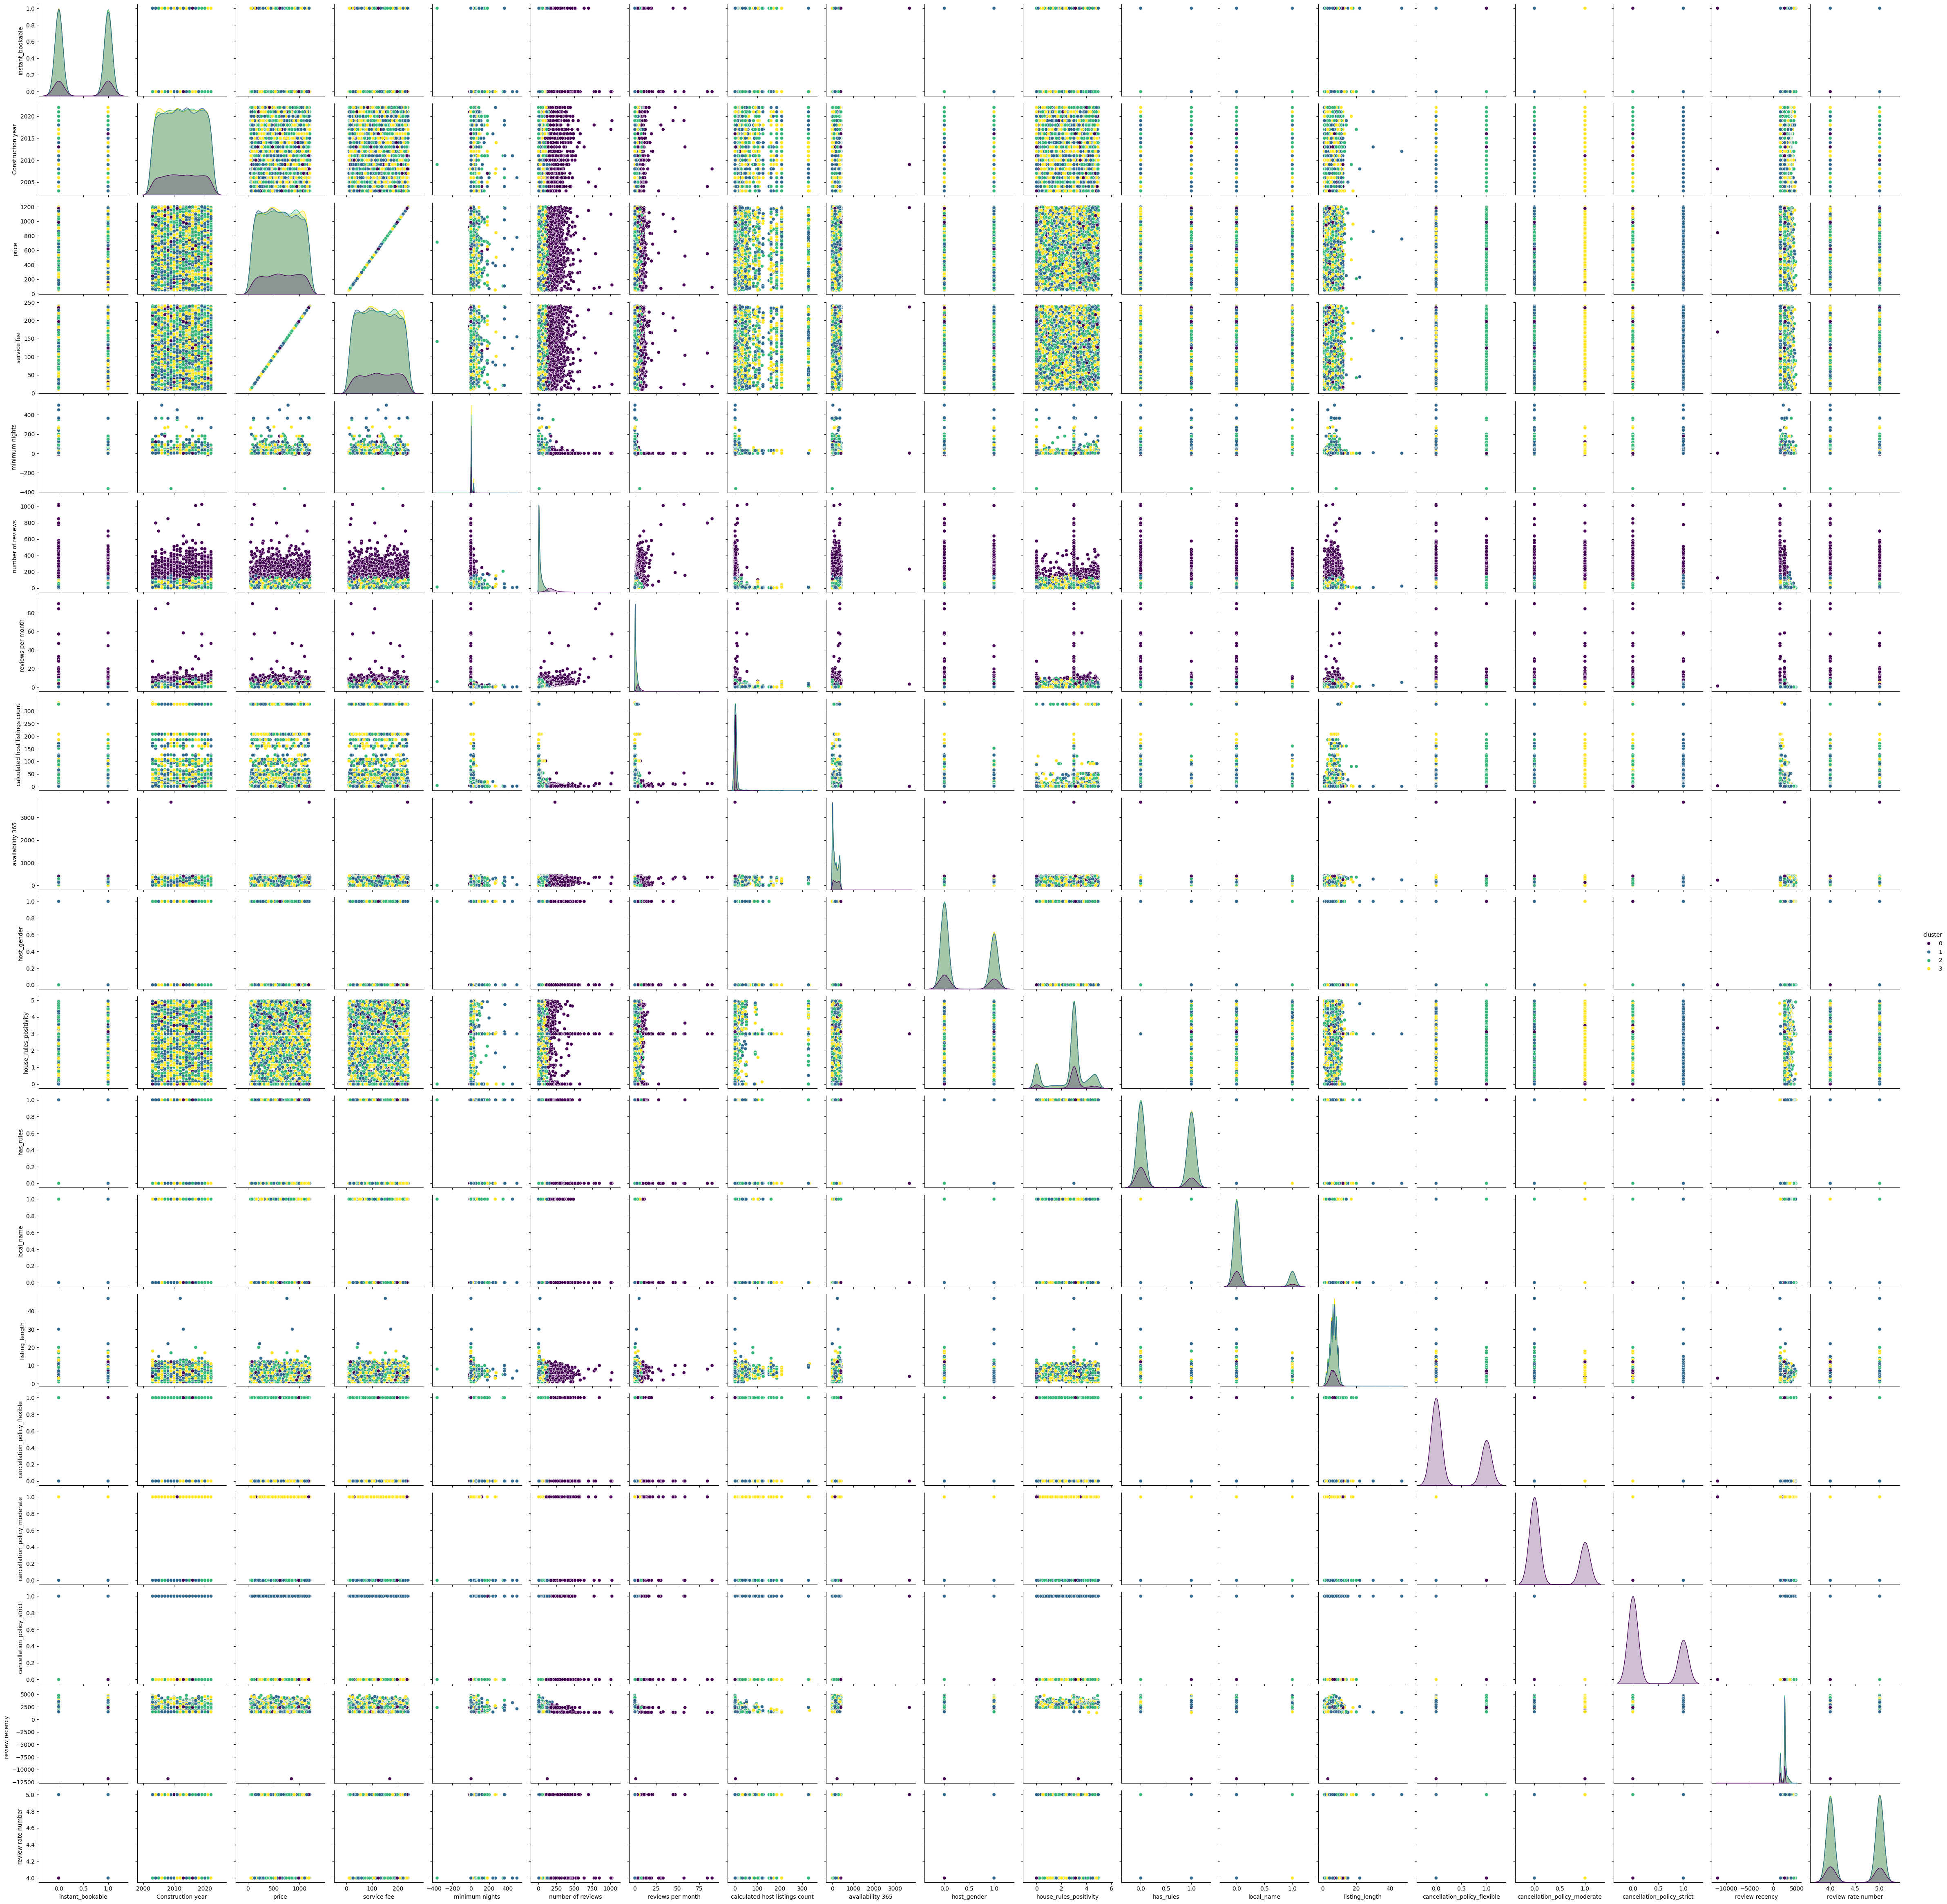

In [ ]:
sns.pairplot(high_rated_listings, hue='cluster', palette='viridis')
plt.show()

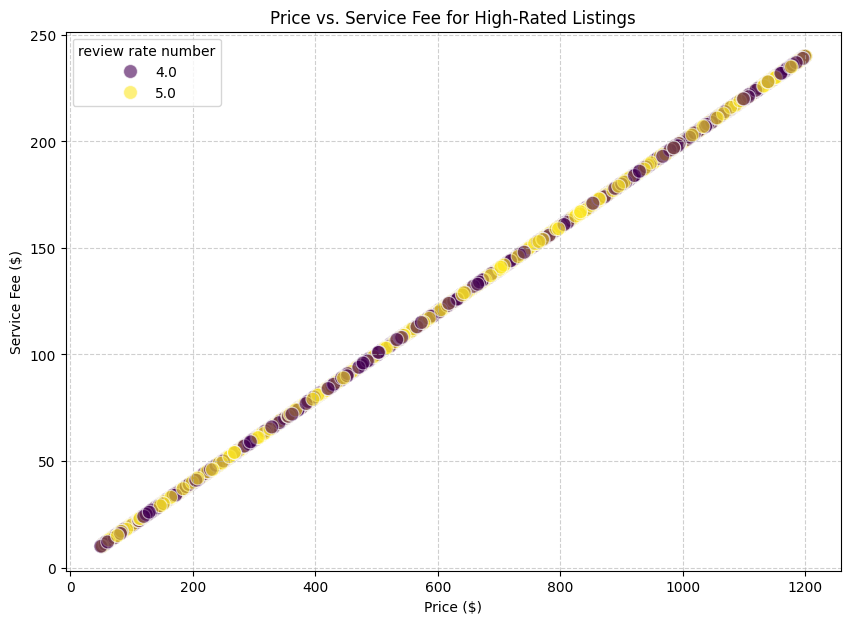

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='price', y='service fee', data=high_rated_listings, hue='review rate number', palette='viridis', s=100, alpha=0.6)
plt.title('Price vs. Service Fee for High-Rated Listings')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()